In [1]:
#setting up libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
#load data
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
gs_data = pd.read_csv('data/gender_submission.csv')

In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#we can drop Name and Ticket, but let's take a closer look
print("the length of the Name column is {0} and the nubmer of unique items in the columns is {1}".format(len(train_data.Name), len(train_data['Name'].unique())))

the length of the Name column is 891 and the nubmer of unique items in the columns is 891


In [6]:
#clearly not a catagorical feature, let's do the same check for Ticket
print("the length of the Ticket column is {0} and the nubmer of unique items in the columns is {1}".format(len(train_data.Ticket), len(train_data['Ticket'].unique())))

the length of the Ticket column is 891 and the nubmer of unique items in the columns is 681


In [7]:
#looks like there are over 200 non unique items in the list, about 25% of the total number of items in the list, let's see if these are missing values
train_data.Ticket.isnull().sum()

0

In [8]:
# trying to see if there is any pattern in the duplicates
from collections import Counter
ticket_count = dict(Counter(train_data.Ticket))
dup_items = {}

for i in ticket_count:
    if ticket_count[i] != 1:
        dup_items.update({i : ticket_count[i]})
        
print(dup_items)
#based on the results below, we can go ahead a delete this column

{'113803': 2, '349909': 4, '347742': 3, '237736': 2, 'PP 9549': 2, '347082': 7, '382652': 5, '239865': 2, '347077': 4, '19950': 4, 'PC 17569': 2, 'PC 17604': 2, '113789': 2, '345764': 2, '2651': 2, '11668': 2, 'SC/Paris 2123': 3, '349237': 2, '3101295': 6, 'PC 17572': 3, 'C.A. 34651': 3, 'CA 2144': 6, '113572': 2, '36973': 2, '347088': 6, '2661': 2, 'S.O.C. 14879': 5, '1601': 7, '248738': 2, '364516': 2, '3101278': 2, 'W./C. 6608': 4, 'C.A. 2315': 2, '231919': 2, '244367': 2, '35281': 2, '371110': 3, '110465': 2, '2665': 2, '2627': 2, 'PC 17558': 2, '2668': 2, '7534': 2, 'PC 17593': 2, '2678': 2, 'STON/O2. 3101279': 2, 'C.A. 33112': 2, '230080': 3, '113776': 2, 'CA. 2343': 7, '363291': 3, '113505': 2, '4133': 4, 'LINE': 4, '230136': 2, '370365': 2, '364849': 2, '347054': 2, '2699': 2, '35273': 3, '243847': 2, '19943': 2, 'C.A. 31921': 3, '367230': 2, '19928': 2, '250649': 2, '11751': 2, '244252': 2, 'A/5. 3336': 2, '370129': 2, '110152': 3, 'PC 17755': 3, '230433': 2, '110413': 3, 'PC 

In [9]:
#columns to delete
#Name
#PassengerId
#Ticket

In [10]:
#next, let's look at missing values
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
test_data.Fare.dropna()

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 417, dtype: float64

In [12]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
test_data_afterFareNaDrop = test_data.dropna(subset=['Fare'])

In [14]:
test_data_afterFareNaDrop.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64

In [15]:
test_data.Cabin.unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [16]:
def dup_feq (data_list):
    dup_count = dict(Counter(data_list))
    dup_items = {}

    for i in dup_count:
        if dup_count[i] != 1:
            dup_items.update({i : dup_count[i]})
        
    print(dup_items)

In [17]:
dup_feq(test_data.Cabin.dropna())

{'B45': 2, 'B57 B59 B63 B66': 3, 'C78': 2, 'C31': 2, 'C23 C25 C27': 2, 'C101': 2, 'C55 C57': 2, 'C116': 2, 'C6': 2, 'F4': 2, 'E34': 2, 'C80': 2, 'C89': 2, 'A34': 2}


In [18]:
#no visible pattern, let's drop it

In [19]:
#for Age, we impute with mean

my_imputer = SimpleImputer()

test_data_justAge = test_data.loc[:, test_data.columns == 'Age']
imputed_test_data_Age = pd.DataFrame(my_imputer.fit_transform(test_data_justAge))

#impute removes column name, adding it back
imputed_test_data_Age.columns = test_data_justAge.columns

#adding imputed data to the source df
imputed_test_data = test_data.drop('Age', axis=1).join(imputed_test_data_Age)


In [20]:
#encoding categorical variable, judging from the previous analyses, One-Hot Encoding is the best option


OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_test_data_col = OH_encoder.fit_transform(test_data[['Sex','Embarked']])
OH_test_data_col_df = pd.DataFrame(OH_test_data_col)
OH_test_data_col_df.index = test_data[['Sex','Embarked']].index
test_data.drop(['Sex','Embarked'], axis=1)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN
416,1308,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,NaN


In [21]:
#let's build a preprocess function

def data_preprocess (source_df):
    
    #first we drop the unwanted columns
    source_df_droped = source_df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
    
    #then we impute Age
    age_imputer = SimpleImputer()

    source_df_droped_justAge = source_df_droped.loc[:, source_df_droped.columns == 'Age']
    imputed_Age = pd.DataFrame(age_imputer.fit_transform(source_df_droped_justAge))

    #impute removes column name, adding it back
    imputed_Age.columns = source_df_droped_justAge.columns

    #adding imputed data to the source df
    source_df_imputed = source_df_droped.drop('Age', axis=1).join(imputed_Age)
    
    #next we apply One-Hot
    OH_en = OneHotEncoder(handle_unknown='ignore', sparse=False)
    OH_source_df_imputed_col = OH_en.fit_transform(source_df_imputed[['Sex','Embarked']])
    OH_source_df_imputed_col = pd.DataFrame(OH_source_df_imputed_col)
    OH_source_df_imputed_col.index = source_df_imputed[['Sex','Embarked']].index
    processed_df = source_df_imputed.drop(['Sex','Embarked'], axis=1).join(OH_source_df_imputed_col)
    return processed_df

In [22]:
test_data_clean = data_preprocess (test_data)
test_data_clean

,Pclass,SibSp,Parch,Fare,Age,0,1,2,3,4
0,3,0,0,7.8292,34.50000,0.0,1.0,0.0,1.0,0.0
1,3,1,0,7.0000,47.00000,1.0,0.0,0.0,0.0,1.0
2,2,0,0,9.6875,62.00000,0.0,1.0,0.0,1.0,0.0
3,3,0,0,8.6625,27.00000,0.0,1.0,0.0,0.0,1.0
4,3,1,1,12.2875,22.00000,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,8.0500,30.27259,0.0,1.0,0.0,0.0,1.0
414,1,0,0,108.9000,39.00000,1.0,0.0,1.0,0.0,0.0
415,3,0,0,7.2500,38.50000,0.0,1.0,0.0,0.0,1.0
416,3,0,0,8.0500,30.27259,0.0,1.0,0.0,0.0,1.0


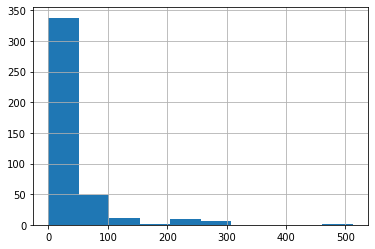

In [23]:
test_data_clean.Fare.hist()